<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/%5BPET%5D_atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Dados das Séries Temporais

Este conjunto de dados contém preços de ações do Financial Times - Exchange (FTSE), NIKKEI (Japão), S&P e DAX (Alemão) no intervalo entre 1994 - 2018.

In [ ]:
path = 'https://raw.githubusercontent.com/genarioazevedoufape/atividades_pet_data_science/main/times_series/Mercados%20financeiros/Index2018.csv'
dados = pd.read_csv(path)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [ ]:
dados.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
dados.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [ ]:
dados.date = pd.to_datetime(dados.date, format='%d/%m/%Y')

In [ ]:
dados.set_index('date', inplace=True)

<Axes: xlabel='date'>

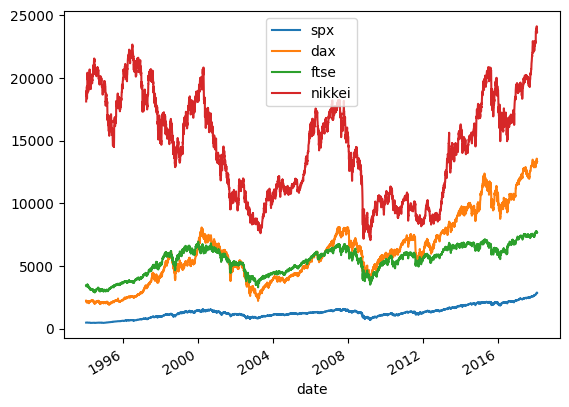

In [ ]:
dados.plot()

### Série Temporal DAX

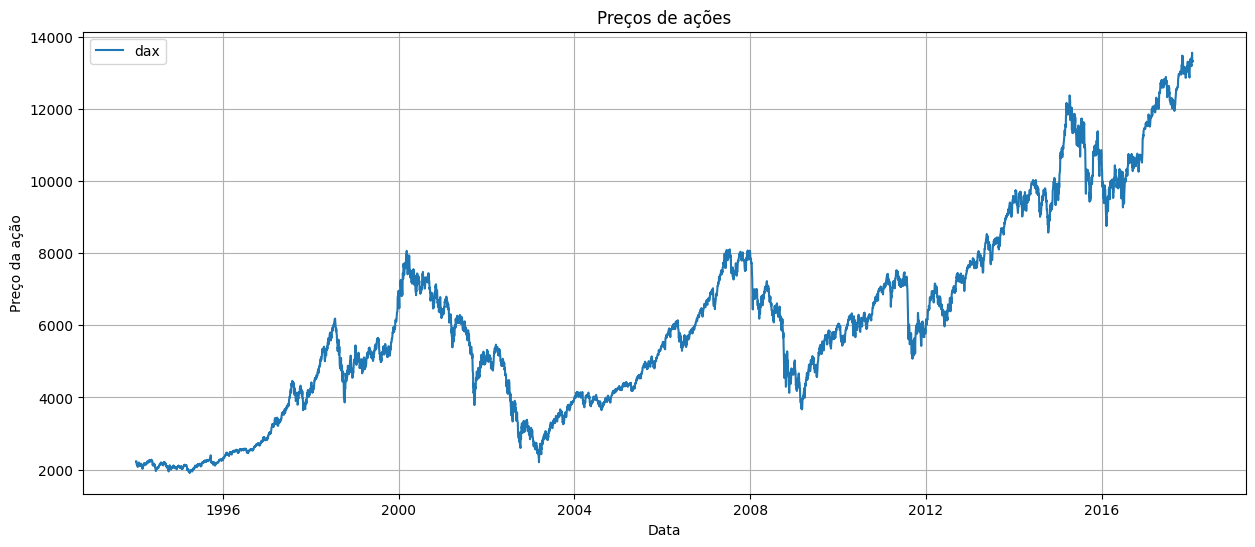

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dados.index, dados['dax'], label='dax')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.title('Preços de ações')
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra uma tendência de alta. Existem flutuações notáveis ao longo do tempo, com picos e vales evidentes.

####Análise de Tendência ROLLING / Média Movél

In [ ]:
media = dados['dax'].rolling(window = 30, min_periods = 10).mean()
desv = dados['dax'].rolling(window = 30,  min_periods = 10).std()

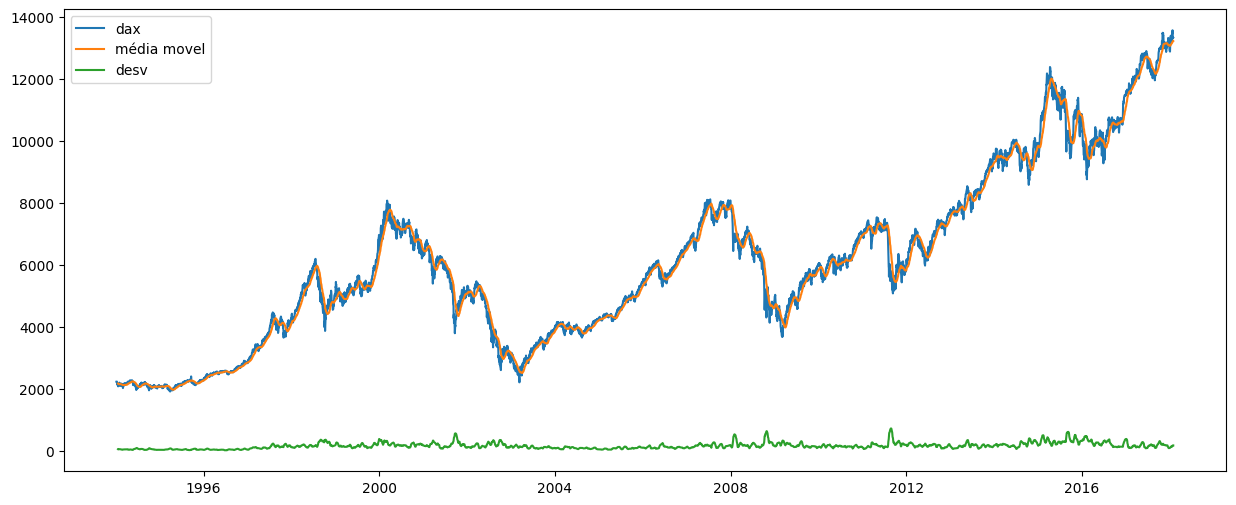

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados['dax'], label = 'dax')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação DAX é calculada com uma janela de 30 dias e requer pelo menos 10 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo do tempo. Isso sugere que o preço da ação tende a alta. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

#### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dados_mensais = dados.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados_mensais['dax'], model='multiplicative')

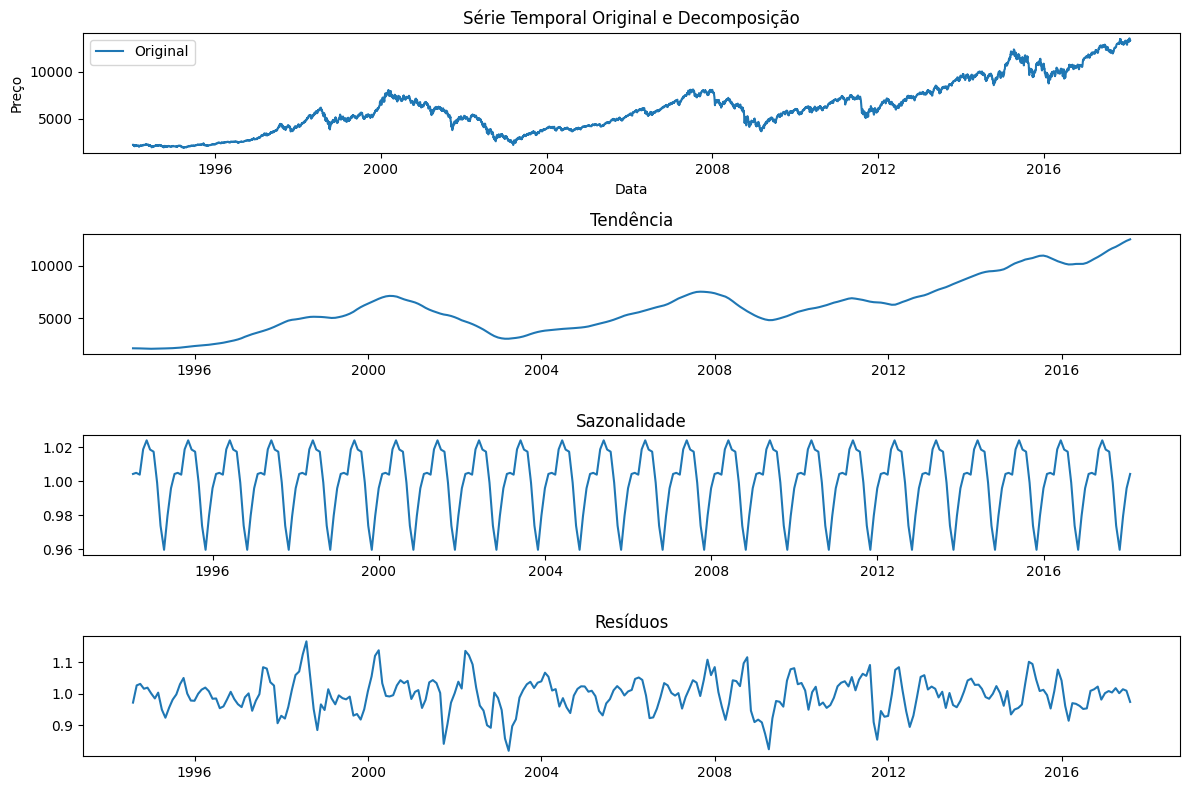

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados.index, dados['dax'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:


*   A série temporal mostra uma tendência ascendente, indicando um aumento ao longo do tempo.

*  As flutuações regulares sugerem padrões sazonais.

*  As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

In [ ]:
import statsmodels.api as sm

<Figure size 1500x600 with 0 Axes>

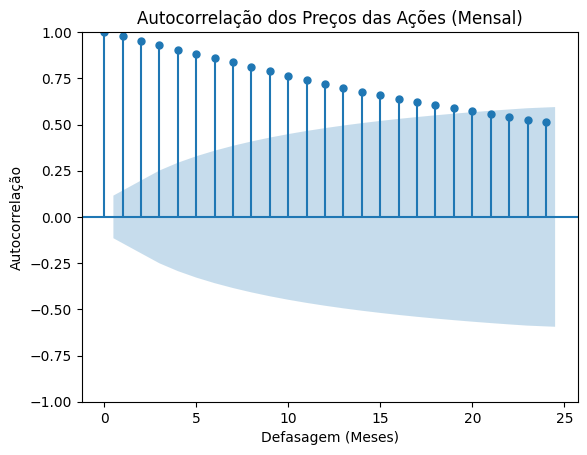

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_mensais['dax'], lags=24)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


O gráfico indica uma autocorrelação positiva. E a diminuição da correlação indicando uma tendência na distribuição dos dadsos. À medida que a defasagem aumenta, próximo aos 20 meses, a autocorrelação diminui, sugerindo que os preços das ações estão menos correlacionados com valores mais distantes no tempo.

> A função de autocorrelação (FAC), mede o grau de correlação de uma variável, em um dado instante, consigo mesma, em um instante de tempo posterior,


####Teste ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dados_mensais.dax)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.007768492603884336
Valor-p: 0.9591698391547631
Valores críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


 Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

>O teste ADF (Augmented Dickey-Fuller) é um teste estatístico usado para determinar se uma série temporal tem raiz unitária, o que significa que a série temporal é não estacionária. Se a série temporal não for estacionária, isso pode indicar a presença de tendências ou padrões que mudam ao longo do tempo.

### Série Temporal SPX

In [ ]:
dados_10_anos = dados['2007-01-01':'2018-01-29']

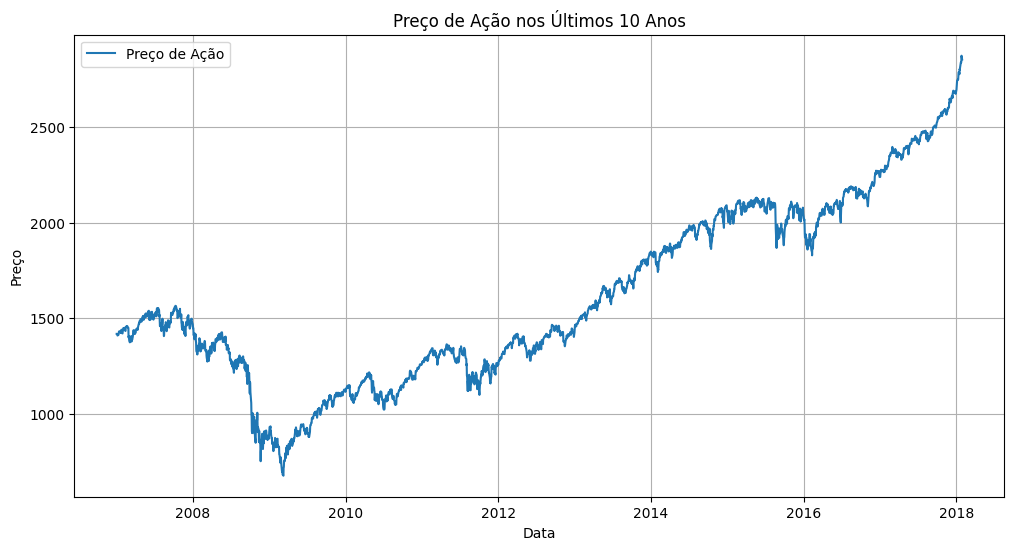

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dados_10_anos.index, dados_10_anos['spx'], label='Preço de Ação')
plt.title('Preço de Ação nos Últimos 10 Anos')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

####Análise de Tendência ROLLING / Média Movél

In [ ]:
media = dados_10_anos['spx'].rolling(window = 14, min_periods = 7).mean()
desv = dados_10_anos['spx'].rolling(window = 14,  min_periods = 7).std()

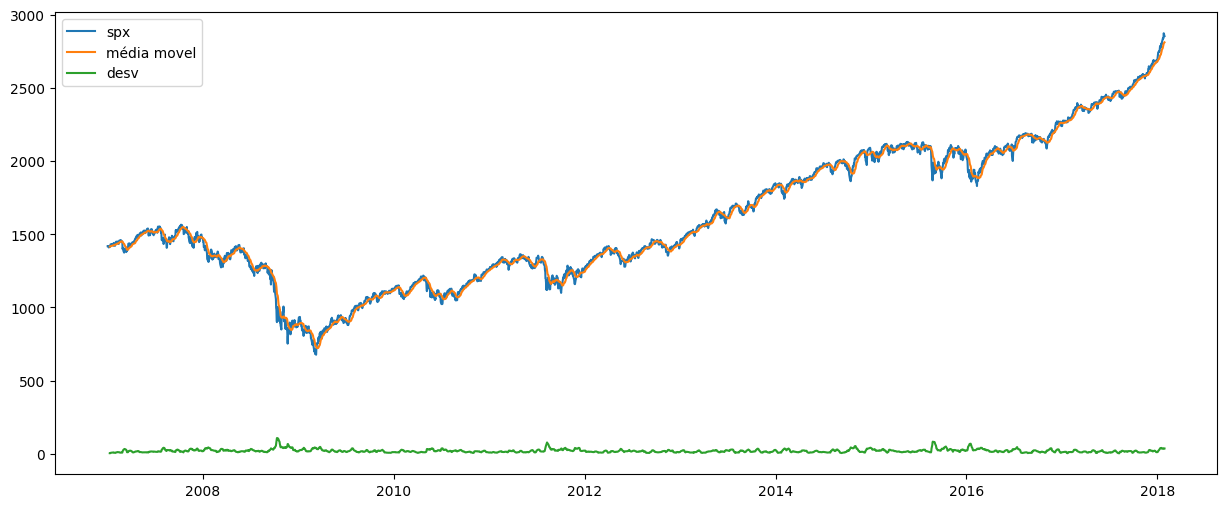

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados_10_anos['spx'], label = 'spx')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação SPX é calculada com uma janela de 14 dias e requer pelo menos 7 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo no intervalo de 10 anos. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

#### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
dados_mensais_10_anos = dados_10_anos.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados_mensais_10_anos['spx'], model='multiplicative')

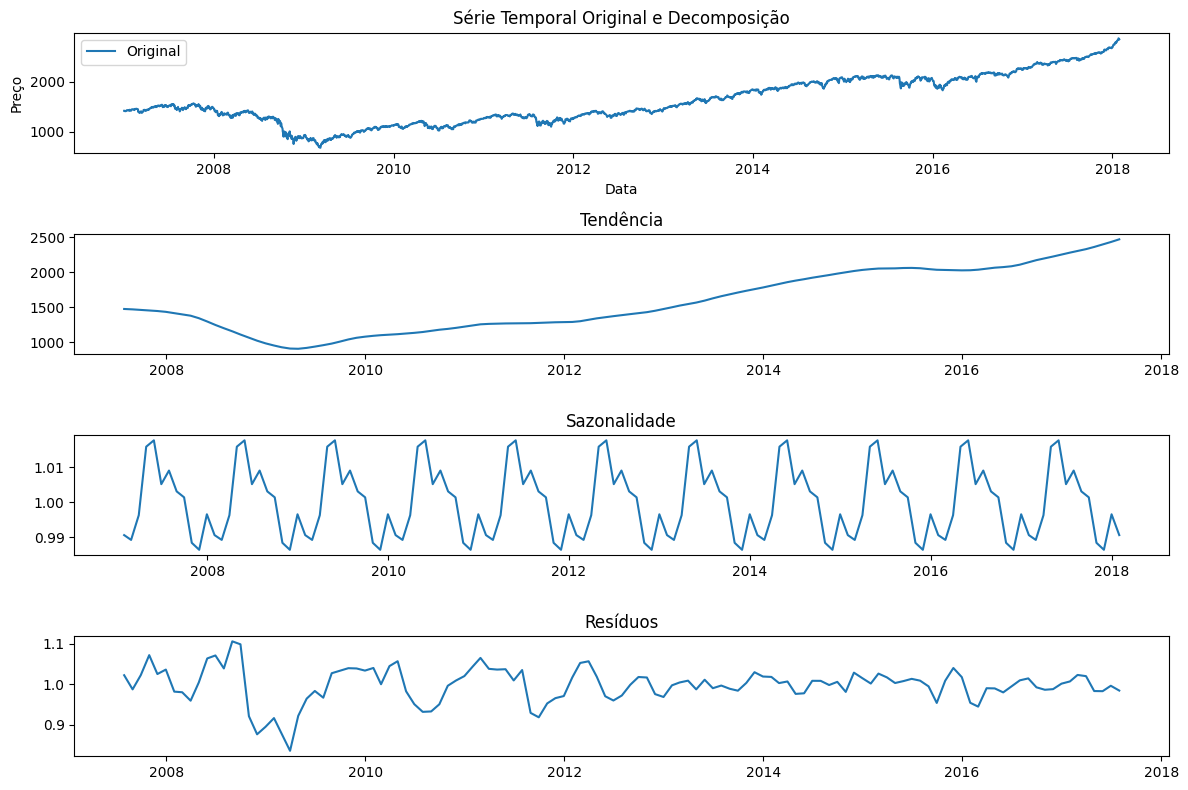

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados_10_anos.index, dados_10_anos['spx'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:

* A série temporal mostra uma tendência ascendente, indicando um aumento ao longo
do tempo.

* As flutuações regulares sugerem padrões sazonais.

* As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

<Figure size 1500x600 with 0 Axes>

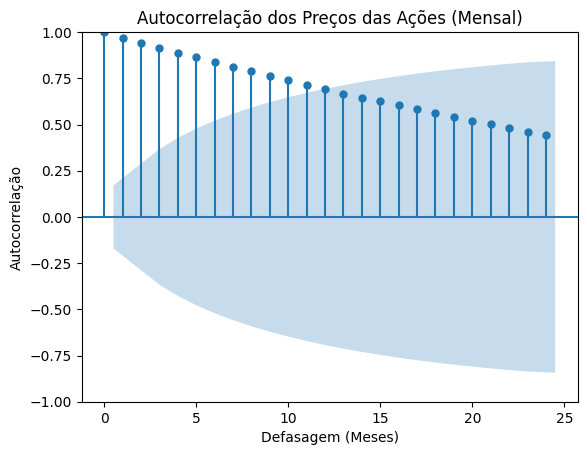

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_mensais_10_anos['spx'], lags=24)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()


O gráfico indica uma autocorrelação positiva. À medida que a defasagem aumenta, próximo após os 10 meses, a autocorrelação diminui, sugerindo que os preços das ações estão menos correlacionados com valores mais distantes no tempo.


####Teste de ADF

In [ ]:
result = adfuller(dados_mensais_10_anos.spx)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.9101933007208886
Valor-p: 0.993221920167874
Valores críticos:
	1%: -3.483
	5%: -2.884
	10%: -2.579


Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

###Análise Preço da Ação da NIKKEI

In [ ]:
dados_2_anos = dados['2016-01-29':'2018-01-29']

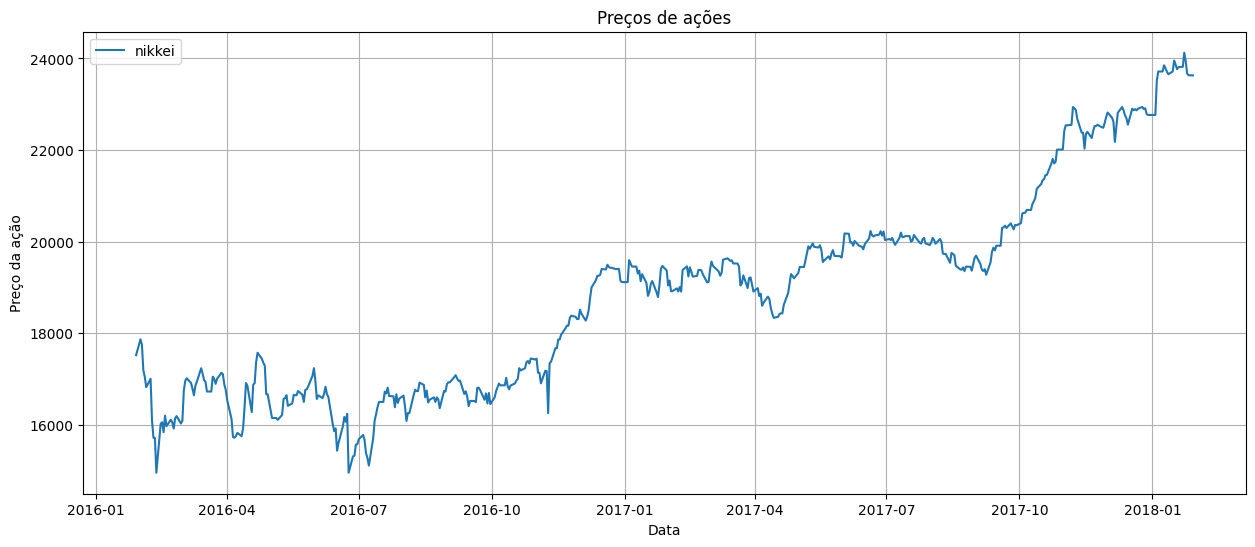

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dados_2_anos.index, dados_2_anos['nikkei'], label='nikkei')
plt.xlabel('Data')
plt.ylabel('Preço da ação')
plt.title('Preços de ações')
plt.legend()
plt.grid(True)
plt.show()

O gráfico mostra uma forte tendência de alta de longo prazo, com o preço do NIKKEI subindo consistentemente.

####Análise de Tendência ROLLING / Média Movél




In [ ]:
media = dados_2_anos['nikkei'].rolling(window = 7, min_periods= 3).mean()
desv = dados_2_anos['nikkei'].rolling(window = 7, min_periods= 3).std()

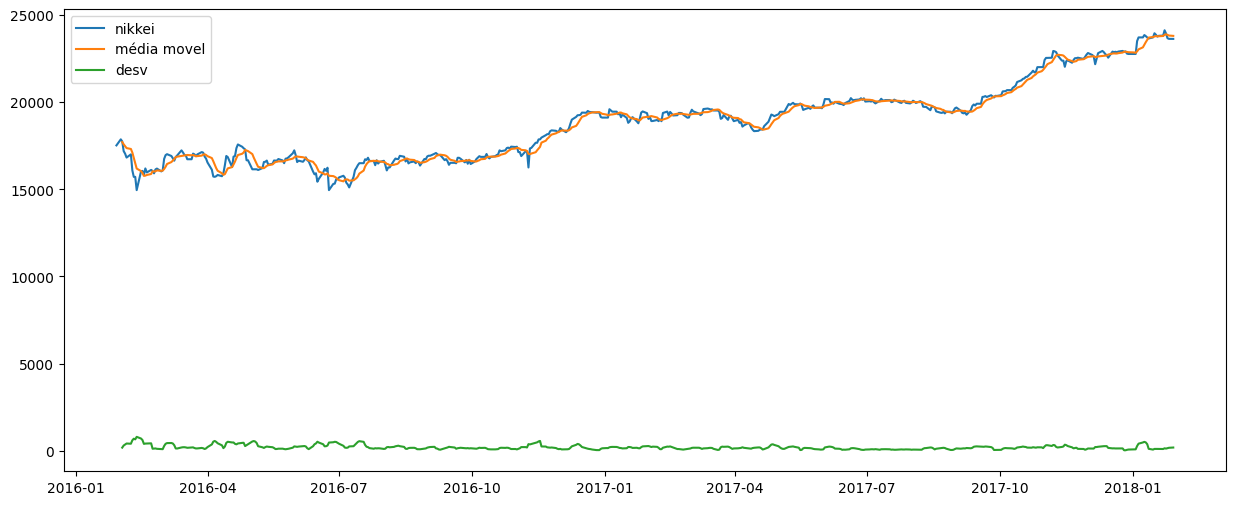

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dados_2_anos['nikkei'], label = 'nikkei')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação NIKKEI é calculada com uma janela de 7 dias e requer pelo menos 3 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo do tempo. A uma pequena discrepância entre a média móvel e os dados originais demonstrando uma correlação mediana, podendo não está representando da melhor forma os dados.

#### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
decomposicao = seasonal_decompose(dados_2_anos['nikkei'], model='multiplicative', period=30)

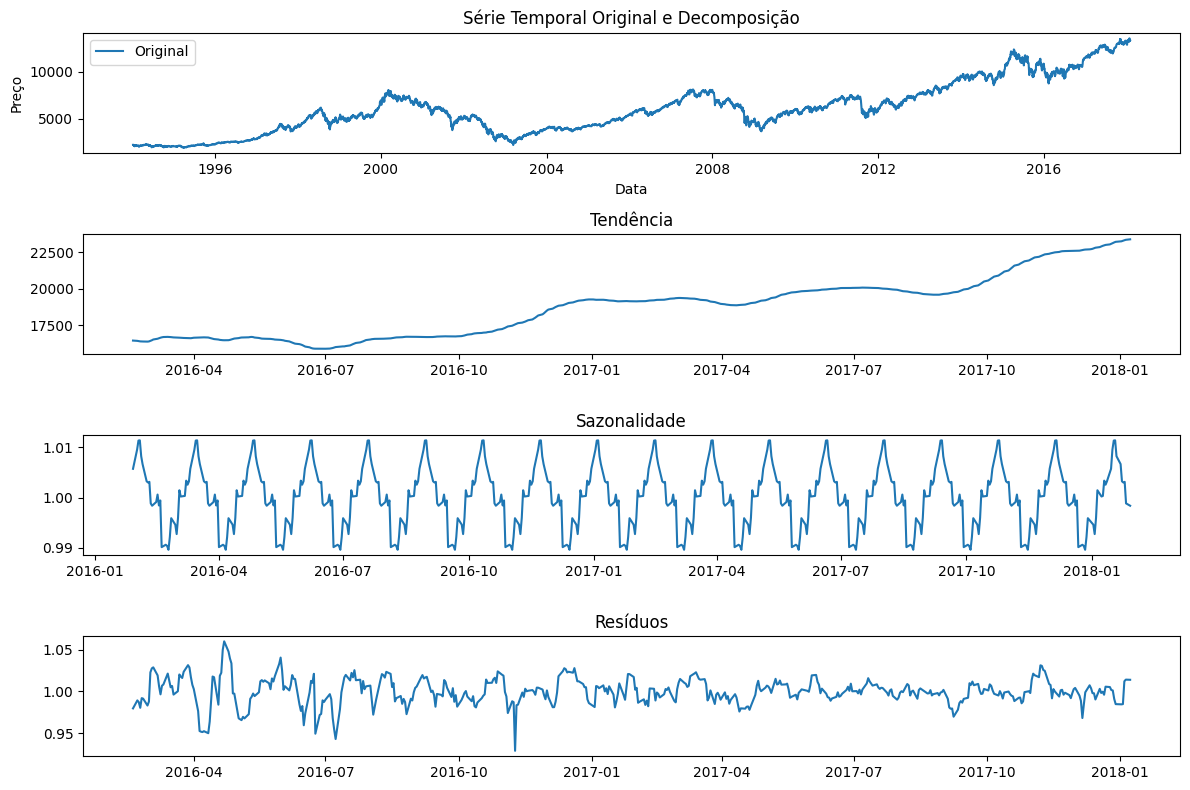

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(dados.index, dados['dax'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:

* Mostra o movimento geral dos dados, indicando uma tendencia de alta, com leve flutuações de queda ao longo do período.

* Revela padrões que se repetem em intervalos regulares, como mensal ou anual.

* As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

<Figure size 1500x600 with 0 Axes>

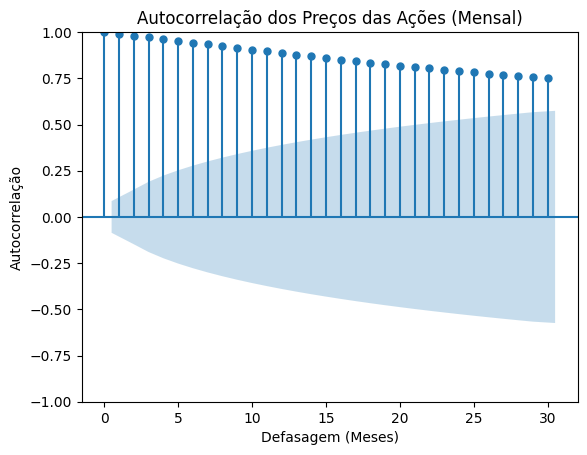

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_2_anos['nikkei'], lags=30)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()

O gráfico indica uma autocorrelação positiva. Não observou-se uma defasagem significativa das autocorrelações na configuração de 30 lags.

<Figure size 1500x600 with 0 Axes>

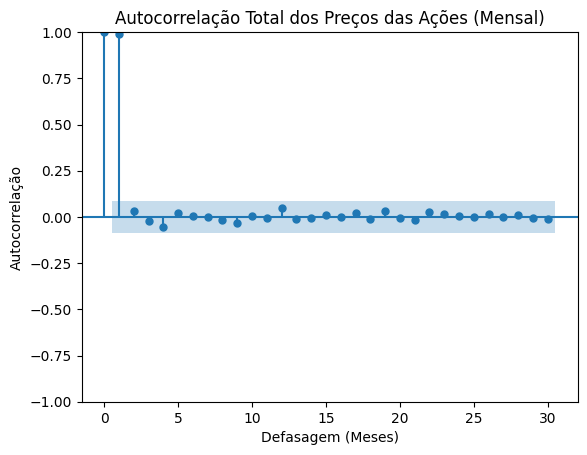

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_pacf(dados_2_anos['nikkei'], lags=30)
plt.title('Autocorrelação Total dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()

O gráfico indica uma autocorrelação positiva no lag 1. Não há uma certeza significativa para autocorrelações das demais lags. Ou seja, autocorrelação igual a zero ou muito próxima de zero, indicando que a série é aleatória

> A função de autocorrelação parcial (FACP), mede o grau de correlação de uma variavel separadas por k unidades de tempo.




####Teste ADF

In [ ]:
result = adfuller(dados_mensais.dax)
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: 0.007768492603884336
Valor-p: 0.9591698391547631
Valores críticos:
	1%: -3.454
	5%: -2.872
	10%: -2.572


Com base nos resultados do teste ADF, não podemos considerar os dados como estacionários. Isso sugere que os preços das ações possuem algum tipo de tendência ou padrão que varia ao longo do tempo.

##Análise de Série Temporal da Ação da VALE3
Utilizando a biblioteca yfinance

In [ ]:
import yfinance as yf

In [ ]:
serie_vale = yf.download('VALE3.SA',start='2019-01-01', end='2024-04-10', rounding=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
type(serie_vale)

pandas.core.frame.DataFrame

In [ ]:
serie_vale

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.01,51.37,49.79,51.09,33.36,17319600
2019-01-03,50.80,50.94,48.40,49.00,31.99,30120000
2019-01-04,49.82,52.45,49.82,52.19,34.08,43360100
2019-01-07,52.87,53.65,51.72,51.91,33.89,20998900
2019-01-08,52.20,52.80,51.62,52.41,34.22,19925600
...,...,...,...,...,...,...
2024-04-03,61.37,61.64,60.55,61.05,61.05,22319900
2024-04-04,60.90,61.29,60.17,60.37,60.37,22990500
2024-04-05,60.28,60.48,59.61,59.71,59.71,15379000


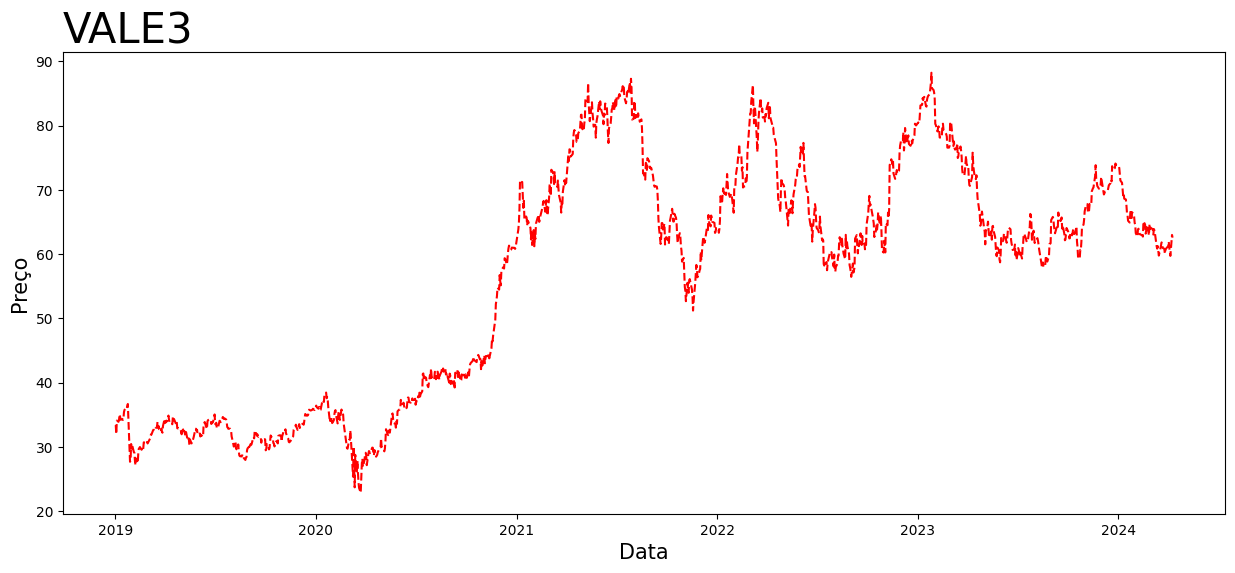

In [ ]:
plt.figure(figsize=(15,6), facecolor='white')
plt.plot(serie_vale['Adj Close'], 'r--')
plt.title('VALE3', fontsize=30, loc='Left')
plt.xlabel('Data', fontsize=15)
plt.ylabel('Preço', fontsize=15)
plt.show()

A série mostra flutuações significativas no preço das ações da VALE3 ao longo dos anos.

####Análise de Tendência ROLLING / Média Movél


In [ ]:
media = serie_vale['Adj Close'].rolling(window = 10, min_periods = 7).mean()
desv = serie_vale['Adj Close'].rolling(window = 10,  min_periods = 7).std()

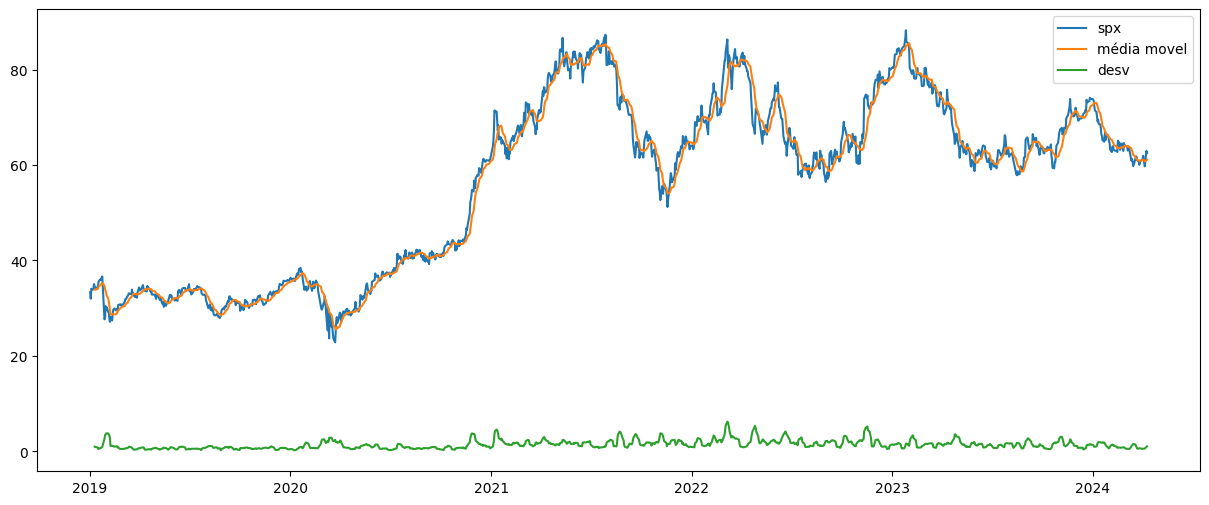

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(serie_vale['Adj Close'], label = 'spx')
plt.plot(media, label = 'média movel')
plt.plot(desv, label = 'desv')
plt.legend(loc='best')
plt.show()

A média móvel em relação a ação VALE3 é calculada com uma janela de 10 dias e requer pelo menos 7 observações não nulas para calcular cada ponto na série. Isso garante que a média móvel seja calculada apenas quando houver dados suficientes disponíveis. Observamos uma tendência geral de alta ao longo do tempo. Isso sugere que o preço da ação está aumentando. A proximidade entre a média móvel e os dados originais demonstra uma correlação forte, significando que a média móvel é um bom representante do comportamento dos dados.

#### Analise dos componentes da série temporal
**Análise da Sazonalidade**

In [ ]:
dados_mensais = serie_vale.resample('M').mean()

In [ ]:
decomposicao = seasonal_decompose(dados_mensais['Adj Close'], model='multiplicative')

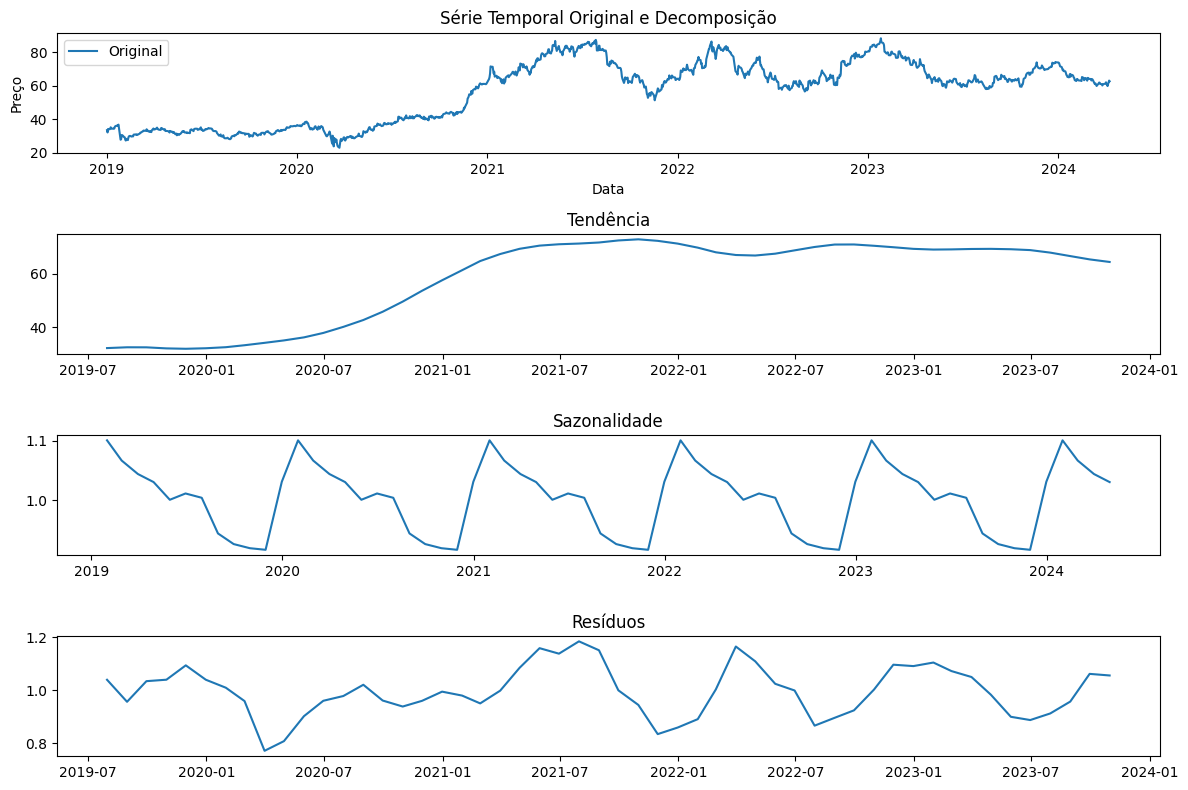

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(serie_vale.index, serie_vale['Adj Close'], label='Original')
plt.title('Série Temporal Original e Decomposição')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

plt.subplot(412)
plt.plot(decomposicao.trend)
plt.title('Tendência')

plt.subplot(413)
plt.plot(decomposicao.seasonal)
plt.title('Sazonalidade')

plt.subplot(414)
plt.plot(decomposicao.resid)
plt.title('Resíduos')

plt.tight_layout()
plt.show()

Observações:

* Mostra o movimento geral dos dados, indicando uma tendencia de alta, com leve flutuações de queda ao longo do período.

* Revela padrões que se repetem em intervalos regulares anuais.

* As variações irregulares em torno de um valor central indicam que há fatores aleatórios afetando a série temporal.

A tendência suave e a sazonalidade clara indicam que a série temporal é consistente e previsível até certo ponto.

<Figure size 1500x600 with 0 Axes>

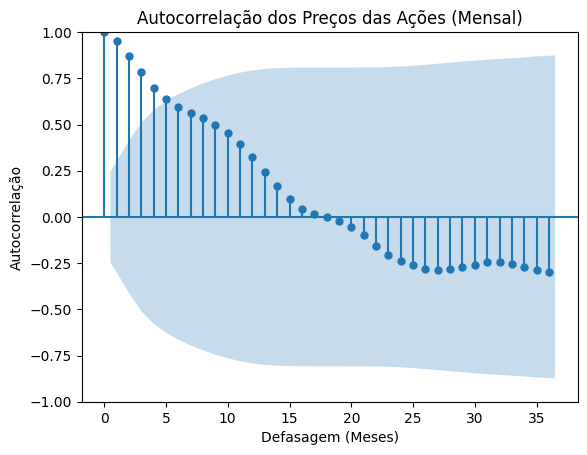

In [ ]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(dados_mensais['Adj Close'], lags=36)
plt.title('Autocorrelação dos Preços das Ações (Mensal)')
plt.xlabel('Defasagem (Meses)')
plt.ylabel('Autocorrelação')
plt.show()

O gráfico indica uma autocorrelação positiva até o lag 4, Mostrando uma queda levemente acentuada, indicando uma tendência, e com valores próximos de zero e até mesmo negativo, indicando uma sazonalidade.

####Teste ADF

In [ ]:
result = adfuller(dados_mensais['Adj Close'])
print('Estatística do teste ADF:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {:.3f}'.format(key, value))


Estatística do teste ADF: -1.486049475605316
Valor-p: 0.5404008305428901
Valores críticos:
	1%: -3.546
	5%: -2.912
	10%: -2.594


Com base nos resultados do teste ADF, a série temporal não pode ser considerada estacionária.

##Considerações

Na análise de séries temporais, a premissa básica é que padrões passados podem fornecer insights sobre o comportamento futuro dos dados. Embora não seja uma garantia absoluta, muitos métodos de previsão de séries temporais, como modelos autoregressivos e modelos de médias móveis, baseiam-se precisamente nessa ideia.

Porém, é importante entender que essa capacidade de prever o futuro com base no passado tem seus limites. Os dados históricos podem mostrar padrões sazonais, tendências e até mesmo flutuações aleatórias que podem ou não continuar no futuro. Além disso, eventos imprevistos podem surgir e afetar os dados de maneiras que os modelos existentes não conseguem prever.

Então, embora seja possível usar o passado para fazer previsões razoáveis sobre o futuro em muitos casos, é fundamental combinar essa abordagem com uma análise mais qualitativa, conhecimento específico do assunto e uma consideração cuidadosa das incertezas e variabilidades que estão sempre presentes nos dados e no contexto em que são usados.





